# Recognising handwritten digits using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data Preparation

In [2]:
df=pd.read_csv('mnist_train.csv')
print(df.shape)

(60000, 785)


In [3]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data=df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [8]:
X= data[:, 1: ]
Y= data[: ,0]

In [9]:
print(X.shape, Y.shape)

(60000, 784) (60000,)


In [12]:
#Splitting data

split= int(0.8*X.shape[0])

X_TRAIN=X[:split, : ]
Y_TRAIN=Y[ :split]


X_TEST= X[split: , :]
Y_TEST= Y [split: ]

# KNN

In [13]:

#Function to calculate eucledian distance between two points
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
#Function for KNN
def knn(x,y,query_point,k=4):
    vals=[] #array to store distances
    m=x.shape[0]
    
    for i in range(m):
        d=dist(query_point,X[i])
        #list of tuples storing the distance from query point and labels of all points in dataset
        vals.append((d,y[i]))       
        
    #sorting this list 
    vals = sorted(vals)
    
    #Taking k nearest neighbours of the query point
    vals=vals[ :k]
    #converting it to numpy array so we cann perform more operations
    vals=np.array(vals)
    #getting number of different classes and their count
    new_vals=np.unique(vals[: , 1], return_counts='True')
    print(new_vals)
    
    max_frequent_index=new_vals[1].argmax()
    pred=new_vals[0][max_frequent_index]
    
    return pred

In [14]:
#VISUALIZE SOME DATA

def drawimg(sample):
    img= sample.reshape(28,28)
    plt.imshow(img)
    plt.show()


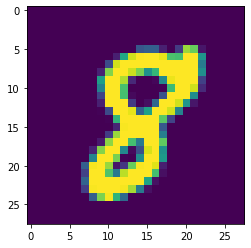

In [17]:
#Colours to this image are given by matplot lib, originally it is black and white
drawimg(X_TEST[3])

In [18]:
#Let's try to predict this using KNN

pred=knn(X_TRAIN,Y_TRAIN,X_TEST[3])
print(int(pred))

(array([8.]), array([4], dtype=int64))
8
